# Übung 11
## Laminatanalyse - Teil 2



In den letzten Vorlesung wurde ein analytisches Ersatzmodel, sowie verschiedene Versagenskriterien für Laminate vorgestellt.
Eingangsgrößen in das Model waren sowohl die geometrischen Größen, wie der Laminataufbau inklusive der Höhe der Einzelschichten, elastische Werkstoffkenngrößen und Festigkeiten, sowie die Beanspruchungen (also die äußeren Lasten).

Aufbauen auf der letzten Übung wollen wir dieses analytische Model weiter in Python umsetzen, um so am Ende in der Lage zu sein, mit wenig Zeilen Code das komplexe Laminatverhalten zu modelieren und ein potentielles Versagen zu analysieren.

### Import der notwendigen Pakete

bitte diese Zelle zu Beginn ausführen

In [1]:
import numpy as np
np.set_printoptions(linewidth=180)
import math
import matplotlib.pyplot as plt

### Aufgabe 10.1

Gegeben seien folgende Matrizen $Q_A$ und $Q_B$ . Vervollständigen Sie die nachfolgende Funktion für die Winkeltransformation von $Q$ \-Matrizen. Definieren Sie sich dabei behilfsweise die Variablen $c$ und $s$. Achten Sie darauf, dass die Funktion $\theta$ als Eingabe in Grad gegeben wird.

Testen Sie die das Ergebnis durch Transformation um 90°, 180° und 360°.

<u>Hinweise:</u>

$T(\vartheta) = \left[ \begin{array}{rrr}
c^2 & s^2 & 2cs \\ 
s^2 & c^2 & -2cs \\
-cs & cs & c^2-s^2 \\ 
\end{array}\right]$

$\bar{Q} = T^{-1}Q T^{-T}$

Dies kann mit *numpy*-Befehlen entweder als

_np.dot(np.dot(T_inv, Q), T_Tinv)_ oder als

_np.linalg.multi_dot([T_inv, Q, T_Tinv])_ geschrieben werden.

In [2]:
Q_A = np.array([[118831., 2112., 0. ],
               [2112, 7681, 0. ],
               [0., 0., 3280]])

Q_B = np.array([[79150., 26911., 0. ],
               [26911., 79150., 0. ],
               [0., 0., 26119.]])

In [3]:
def Q_transform(Q, theta):
    theta = theta * math.pi / 180
    c = math.cos(theta)
    s = math.sin(theta)
    T = np.zeros((3,3)) # leere Matrix vordefinieren
    T = [[c**2, s**2, 2*c*s],
        [s**2, c**2, -2*c*s],
        [-c*s, c*s, c**2-s**2]]
    T_inv = np.linalg.inv(T)
    T_Tinv = np.linalg.inv(np.transpose(T))
    Q_bar = np.dot(np.dot(T_inv,Q),T_Tinv)
    return Q_bar

In [4]:
print(np.around(Q_transform(Q_A, 0), decimals=2))
print(np.around(Q_transform(Q_A, 90), decimals=2))
print(np.around(Q_transform(Q_A, 180), decimals=2))
print(np.around(Q_transform(Q_A, 360), decimals=2))

print('\n')

print(np.around(Q_transform(Q_B, 0), decimals=2))
print(np.around(Q_transform(Q_B, 90), decimals=2))
print(np.around(Q_transform(Q_B, 180), decimals=2))
print(np.around(Q_transform(Q_B, 360), decimals=2))

[[118831.   2112.      0.]
 [  2112.   7681.      0.]
 [     0.      0.   3280.]]
[[  7681.   2112.      0.]
 [  2112. 118831.      0.]
 [     0.      0.   3280.]]
[[118831.   2112.     -0.]
 [  2112.   7681.     -0.]
 [    -0.     -0.   3280.]]
[[118831.   2112.     -0.]
 [  2112.   7681.     -0.]
 [    -0.     -0.   3280.]]


[[79150. 26911.     0.]
 [26911. 79150.     0.]
 [    0.     0. 26119.]]
[[79150. 26911.    -0.]
 [26911. 79150.     0.]
 [   -0.     0. 26119.]]
[[79150. 26911.    -0.]
 [26911. 79150.     0.]
 [   -0.     0. 26119.]]
[[79150. 26911.    -0.]
 [26911. 79150.     0.]
 [   -0.     0. 26119.]]


### Aufgabe 10.2

Erstellen Sie mithilfe von matplotlib für die Matrizen $Q_A$  und $Q_B$  jeweils Polarplots von den Einträgen $\bar{Q}_{11}$ ,$\bar{Q}_{22}$  und $\bar{Q}_{12}$ und diskutieren Sie diese.

An den Codezellen muss nichts geändert werden, sie müssen lediglich ausgeführt werden.


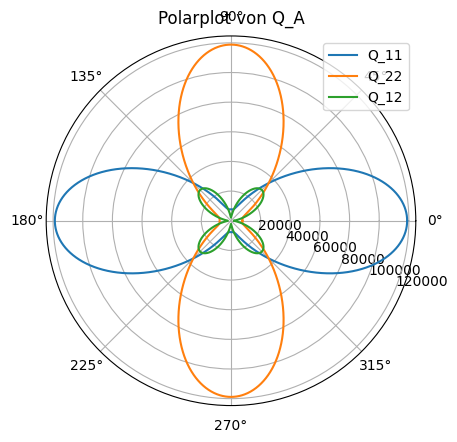

In [5]:
theta_liste_grad = np.arange(0, 360, 0.1)
theta_liste_rad = theta_liste_grad /180 * np.pi

Q_11 = []
for val in theta_liste_grad:
    Q_11.append(Q_transform(Q_A, val)[0][0])
Q_22 = []
for val in theta_liste_grad:
    Q_22.append(Q_transform(Q_A, val)[1][1])
Q_12 = []
for val in theta_liste_grad:
    Q_12.append(Q_transform(Q_A, val)[0][1])

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta_liste_rad, Q_11, label='Q_11')
ax.plot(theta_liste_rad, Q_22, label='Q_22')
ax.plot(theta_liste_rad, Q_12, label='Q_12')
ax.legend()
ax.set_rlabel_position(-22.5)
ax.grid(True)

ax.set_title("Polarplot von Q_A", va='bottom')
plt.show()

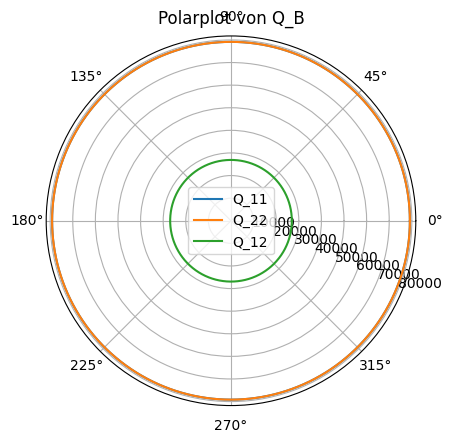

In [6]:
Q_11 = []
for val in theta_liste_grad:
    Q_11.append(Q_transform(Q_B, val)[0][0])
Q_22 = []
for val in theta_liste_grad:
    Q_22.append(Q_transform(Q_B, val)[1][1])
Q_12 = []
for val in theta_liste_grad:
    Q_12.append(Q_transform(Q_B, val)[0][1])

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta_liste_rad, Q_11, label='Q_11')
ax.plot(theta_liste_rad, Q_22, label='Q_22')
ax.plot(theta_liste_rad, Q_12, label='Q_12')
ax.legend()
ax.set_rlabel_position(-22.5)
ax.grid(True)

ax.set_title("Polarplot von Q_B", va='bottom')
plt.show()

### Aufgabe 10.3

Gegeben sei die $Q$\-Matrix für eine UD\-Einzelschicht aus E\-Glasfasern und Epoxidharz. 

Gegeben sei ein UD\-Laminataufbau aus vier Schichten.

Definieren Sie die folgenden Layups analog. Dabei sollen die Schichten immer aus 0,2 mm mit der gegebenen Q\-Matrix für GFK bestehen.

- L2: \[45 / \-45\]
- L3: \[45 / \-45\]s
- L4: \[0 / 90 / 45 / \-45\]s



In [7]:
Q_GFK_UD = np.array([[32101., 2689., 0.],
                   [2689., 9022., 0.],
                   [0., 0. , 3282.]])

In [8]:
layup_1 = [{'Q':Q_GFK_UD,'t':0.2,'theta':0},
          {'Q':Q_GFK_UD,'t':0.2,'theta':0},
          {'Q':Q_GFK_UD,'t':0.2,'theta':0},
          {'Q':Q_GFK_UD,'t':0.2,'theta':0},]

layup_2 = [{'Q':Q_GFK_UD,'t':0.2,'theta':45},
          {'Q':Q_GFK_UD,'t':0.2,'theta':-45},]

layup_3 = [{'Q':Q_GFK_UD,'t':0.2,'theta':45},
          {'Q':Q_GFK_UD,'t':0.2,'theta':-45},
          {'Q':Q_GFK_UD,'t':0.2,'theta':-45},
          {'Q':Q_GFK_UD,'t':0.2,'theta':45},]

layup_4 = [{'Q':Q_GFK_UD,'t':0.2,'theta':0},
          {'Q':Q_GFK_UD,'t':0.2,'theta':90},
          {'Q':Q_GFK_UD,'t':0.2,'theta':45},
          {'Q':Q_GFK_UD,'t':0.2,'theta':-45},
          {'Q':Q_GFK_UD,'t':0.2,'theta':-45},
          {'Q':Q_GFK_UD,'t':0.2,'theta':45},
          {'Q':Q_GFK_UD,'t':0.2,'theta':90},
          {'Q':Q_GFK_UD,'t':0.2,'theta':0},]

### Aufgabe 10.4

Schauen Sie sich die folgende Klassendefinition für Laminatobjekte an. Ergänzen Sie die Berechnungen der ABD\- sowie der invertierten ABD\-Matrix.

Ergänzen Sie eine klasseninterne Funktion "add_lamina(Q, t, theta)" mit der sich dem Layup eine weitere Schicht hinzufügen lässt.

<u>Hinweise:</u> 

$A_{ij} = \sum_{k_=1}^{N} (\bar{Q}_{ij})_k (z_k - z_{k-1})$

$B_{ij} = \frac12 \sum_{k_=1}^{N} (\bar{Q}_{ij})_k (z_k^2 - z_{k-1}^2)$

$D_{ij} = \frac13 \sum_{k_=1}^{N} (\bar{Q}_{ij})_k (z_k^3 - z_{k-1}^3)$

In [9]:
# Musterlösung:

class laminate:

    # Initiierung eines laminate-Objektes

    def __init__(self, layup):
        self.layup = layup
        self.ABD = np.zeros((6,6))
        self.ABD_inv = np.zeros((6,6))
        self.t = 0.

    # Methode zum Berechnen der Laminatdicke

    def calc_t(self):
        self.t = 0
        for n in range(len(self.layup)):
            self.t = self.t + self.layup[n]['t']

    # Methode zum Berechnen der ABD-Matrix des Laminates

    def calc_ABD(self):
        A = np.zeros((3,3))
        B = np.zeros((3,3))
        D = np.zeros((3,3))
        self.calc_t()
        z_u = -self.t/2 # untere z-Koordinate der untersten Lage
        
        for k in range(len(self.layup)):
            Q_bar = Q_transform(self.layup[k]['Q'],self.layup[k]['theta'])
            
            z_o = z_u+self.layup[k]['t']

            A_k = Q_bar*(z_o-z_u)
            A = A+A_k

            B_k = 1/2*Q_bar*(z_o**2-z_u**2)
            B = B+B_k

            D_k = 1/3*Q_bar*(z_o**3-z_u**3)
            D = D+D_k
            
            z_u = z_o # vorbereitend für nächste Lage wird aktuell obere z-Koordinate als neue untere festgelegt

        AB = np.append(A, B, axis=0) #führt Matrizen vertikal zusammen
        BD = np.append(B, D, axis=0) #führt Matrizen vertikal zusammen
        ABD = np.append(AB, BD, axis=1) #führt Matrizen horizontal zusammen
        self.ABD = ABD
        self.ABD_inv = np.linalg.inv(self.ABD)

    def add_lamina(Q, t, theta=0):
        self.layup = self.layup + [{'Q':Q, 't':t, 'theta': theta}]


### Aufgabe 10.5

Instanzieren Sie vier Laminate mit den gegebenen UD\-Aufbauten

Berechnen Sie und geben Sie jeweils die ABD\-Matrix der Laminate aus. Diskutieren Sie diese.

In [10]:
# Musterlösung

lam_1 = laminate(layup_1)
lam_1.calc_ABD()
print(f'Laminat 1 :\n{np.around(lam_1.ABD, decimals=2)}')

lam_2 = laminate(layup_2)
lam_2.calc_ABD()
print(f'Laminat 2 :\n{np.around(lam_2.ABD, decimals=2)}')

lam_3 = laminate(layup_3)
lam_3.calc_ABD()
print(f'Laminat 3 :\n{np.around(lam_3.ABD, decimals=2)}')

lam_4 = laminate(layup_4)
lam_4.calc_ABD()
print(f'Laminat 4 :\n{np.around(lam_4.ABD, decimals=2)}')

Laminat 1 :
[[25680.8   2151.2      0.       0.       0.       0.  ]
 [ 2151.2   7217.6      0.       0.       0.       0.  ]
 [    0.       0.    2625.6      0.       0.       0.  ]
 [    0.       0.       0.    1369.64   114.73     0.  ]
 [    0.       0.       0.     114.73   384.94     0.  ]
 [    0.       0.       0.       0.       0.     140.03]]
Laminat 2 :
[[5962.9  3337.3     0.      0.      0.   -230.79]
 [3337.3  5962.9     0.      0.      0.   -230.79]
 [   0.      0.   3574.5  -230.79 -230.79    0.  ]
 [   0.      0.   -230.79   79.51   44.5     0.  ]
 [   0.      0.   -230.79   44.5    79.51    0.  ]
 [-230.79 -230.79    0.      0.      0.     47.66]]
Laminat 3 :
[[11925.8   6674.6      0.       0.      -0.       0.  ]
 [ 6674.6  11925.8      0.      -0.      -0.       0.  ]
 [    0.       0.    7149.       0.       0.       0.  ]
 [    0.      -0.       0.     636.04   355.98   184.63]
 [   -0.      -0.       0.     355.98   636.04   184.63]
 [    0.       0.       0.   

### Aufgabe 11.1

Im Skript wird in Kapitel 7.2.4 die schriftweise Vorgehensweise für Laminatanalysen von den Kenngrößen der Einzelschichten bis zur Ermittlung der lokalen Spannungen in den Einzelschichten beschrieben:

1. Die Elastizitätskenngrößen der unidirektionalen Einzelschicht sind zu bestimmen. Es werden die Größen $E_1$, $E_2$, $\nu_{12}$ und $G_{12}$ benötigt.
2. Von jeder Einzelschicht wird die Matrix der reduzierten Steifigkeiten bestimmt: $Q$ .
3. Unter Nutzung der Faserwinkel der Einzelschichten werden die reduzierte Steifigkeiten aller Einzelschichten in das gemeinsame globale Laminat\-Koordinatensystem transformiert: ${ \bar Q}$.
4. Mit den Schichtdicken erfolgt die Integration der Einzelschichtsteifigkeiten zur ABD\-Matrix des Konstitutivgesetzes des Gesamtlaminats.
5. Das Konstitutivgesetzes wird invertiert und die Laminatnachgiebigkeitsmatrix  bestimmt. 
6. \(Im Falle hygrothermaler Lasten müssen noch hygrothermische Lasten bestimmt werden.\)
7. Das Konstitutivgesetzes wird nun mit den gegebenen Lasten nach den Laminatverzerrungen und \-krümmungen gelöst.
8. Die Verzerrungen jeder Schicht werden bestimmt.
9. Mit dem reduzierten Elastizitätsgesetz der Einzelschicht werden die Spannungen in jeder Schicht bestimmt.
10. Transformation der Schichtspannungen auf das lokale 1\-2\-Koordinaten der jeweiligen Schicht.

Mit den erlernten Pythonkenntnissen und den Veranstaltungsunterlagen sollen Sie diese Schritte nun für ein Laminat durchführen. Dieser Laminataufbau sei mit \[0 /60 /\-60\] aus CFK\-Lagen mit $E_1 = 118250\,\mathrm{MPa}$, $E_2 = 7644\,\mathrm{MPa}$, $\nu_{12} = 0,275$ und $G_{12} = 3280\,\mathrm{MPa}$ und einer Dicke von jeweils $t=0,3\,\mathrm{mm}$  gegeben. Ermitteln Sie die lokalen Schichtspannungen wenn auf das Laminat global folgende Lasten $N_x = 50\,\mathrm{N/m}$ und $M_y = 20\,\mathrm{N}$ einwirken. Es gibt dabei keine hygrothermalen Lasten.



Schritt 1: Die Elastizitätskenngrößen der unidirektionalen Einzelschicht sind zu bestimmen. Es werden die Größen $E_1$, $E_2$, $\nu_{12}$ und $G_{12}$ benötigt.

In [11]:
# Musterlösung:

E1 = 118250. # [MPa]
E2 = 7644. # [MPa]
nu12 = 0.275 # [-]
G12 = 3280. # [MPa]

Schritt 2: Von jeder Einzelschicht wird die Matrix der reduzierten Steifigkeiten bestimmt: $Q$ .

<u>Hinweise:</u> 

Erstellen Sie eine Klasse für Lamina (Einzelschicht) mit den Eingangsgrößen E1, E2, nu12 und G12. Sie soll als weitere eigene Attribute nu21, S_red und Q haben. Definieren Sie interne Funktionen, mithilfe derer die Einzelschicht nu21, S_red und Q ermitteln kann.

Mithilfe dieser Klasse lassen sich nun einfach neue und andere Schichten (als die bislang verwendete GFK-UD-Schicht, deren Q-Matrix gegeben war) ermitteln. 

Anschließend kann ein Layup ähnlich wie in Aufgabe L2.1 definiert werden, mit dem Unterschied, dass der Eintrag für die Q-Matrix als Attribut des Lamina-Objektes erfolgt. Was vorher mit 

{'Q':Q_GFK_UD,'t':0.2,'theta':0} angegeben wurde, wäre für ein Lamina-Objekt mit Namen "GFK_UD" dann beispielsweise

{'Q':GFK_UD.Q,'t':0.2,'theta':0}.

$S_\text{red} = \left[ \begin{array}{rrr}
\frac{1}{E_1} & -\frac{\nu_{21}}{E_2} & 0 \\ 
-\frac{\nu_{12}}{E_1} & \frac{1}{E_2} & 0 \\
0 & 0 & \frac{1}{G_{12}} \\ 
\end{array}\right]$

$Q = S_\text{red}^{-1}$

In [12]:
# Musterlösung:

# Klassendefinition für Einzelschichtobjekte
class lamina:

    def __init__(self, E1, E2, nu12, G12):
        self.E1 = E1
        self.E2 = E2
        self.nu12 = nu12
        self.G12 = G12
        self.Q = np.zeros((3,3))
        self.S_red = np.zeros((3,3))

    def calc_values(self):
        S_red = np.zeros((3,3))
        S_red[0][0] = 1 / self.E1
        S_red[1][0] = -self.nu12 / self.E1
        S_red[1][1] = 1 / self.E2
        S_red[2][2] = 1 / self.G12
        S_red[0][1] = S_red[1][0]
        self.nu21 = self.nu12 * self.E2 / self.E1
        self.S_red = S_red
        self.Q = np.linalg.inv(S_red)

# Instanzieren eines Lamina-Objektes mit den gegebenen Kenngrößen
CFK_UD = lamina(E1, E2, nu12, G12)
CFK_UD.calc_values()


# Definition des Layups
layup_CFK = [{'Q':CFK_UD.Q,'t':0.3,'theta':0},
          {'Q':CFK_UD.Q,'t':0.3,'theta':60},
          {'Q':CFK_UD.Q,'t':0.3,'theta':-60},]

CFK_UD.Q

array([[118830.91737538,   2112.42681958,      0.        ],
       [  2112.42681958,   7681.55207118,      0.        ],
       [     0.        ,      0.        ,   3280.        ]])

Schritt 3: Unter Nutzung der Faserwinkel der Einzelschichten werden die reduzierte Steifigkeiten aller Einzelschichten in das gemeinsame globale Laminat\-Koordinatensystem transformiert: ${ \bar Q}$.

Schritt 4: Mit den Schichtdicken erfolgt die Integration der Einzelschichtsteifigkeiten zur ABD\-Matrix des Konstitutivgesetzes des Gesamtlaminats.

Schritt 5: Das Konstitutivgesetzes wird invertiert und die Laminatnachgiebigkeitsmatrix  bestimmt. 

<u>Hinweis:</u> 

Hier können die zuvor definierten Funktionen und Klassen verwendet werden. 

Das Transformieren der Q-Matrizen, die Berechnung der ABD-Matrix sowie die Invertierung dieser sollte alles innerhalb der Funktion 'calc_ABD' der Klasse 'laminate' passieren. Zum Ausführen dieser drei Schritte muss also lediglich ein Laminatobjekt instanziert und für dieses die Funktion 'calc_ABD' aufgerufen werden.


In [ ]:
# Musterlösung:

# Alle diese Schritte werden in der Funktion calc_ABD der Laminat-Klasse ausgeführt, 
# nachdem ein Laminatobjekt mit dem zuvor definierten Layup erstellt wurde.

lam_CFK = laminate(layup_CFK)
lam_CFK.calc_ABD()

Schritt 6 entfällt: \(Im Falle hygrothermaler Lasten müssten diese bestimmt werden.\)


Schritt 7: Das Konstitutivgesetzes wird nun mit den gegebenen Lasten nach den Laminatverzerrungen und \-krümmungen gelöst.

<u>Hinweis:</u>

Es ist ein Vektor mit den Laminatlasten zu definieren (und ggf. zu transponieren) und ein Matrixprodukt mit der invertierten ABD-Matrix zu bilden (z.B. mit 'np.dot')

$\left[ \begin{array}{r}
\varepsilon^0\\ 
\kappa\\
\end{array}\right] = 
\left[ \begin{array}{rr}
A & B\\ 
B & D\\
\end{array}\right]^{-1}
\left[ \begin{array}{r}
N\\ 
M\\
\end{array}\right]$

In [14]:
# Musterlösung:

# Definition des Lastvektors
N_vek = np.transpose(np.array([[50, 0, 0, 0, 20, 0]]))

# Berechnung und Ausgabe des Verzerrungsvektors
e_vek = np.dot(lam_CFK.ABD_inv,N_vek)
print(e_vek)

[[ 0.00256567]
 [-0.00274682]
 [ 0.00324863]
 [ 0.00534731]
 [ 0.01901792]
 [ 0.00967479]]


Schritt 8: Die Verzerrungen jeder Schicht werden bestimmt.

Schritt 9: Mit dem reduzierten Elastizitätsgesetz der Einzelschicht werden die Spannungen in jeder Schicht bestimmt.

<u>Hinweise:</u>

Mit der nachfolgenden Formel können die globalen Spannungen in den Einzelschichten berechnet werden. Hier bietet sich eine Schleife an.

$\left[ \begin{array}{r}
\sigma_{xx}\\ 
\sigma_{yy}\\
\tau_{xy}\\
\end{array}\right]_k = 
\left[ \begin{array}{rrr}
\bar{Q}_{11} & \bar{Q}_{12} & \bar{Q}_{16}\\ 
\bar{Q}_{12} & \bar{Q}_{22} & \bar{Q}_{26}\\
\bar{Q}_{16} & \bar{Q}_{26} & \bar{Q}_{66}\\
\end{array}\right]_k
\left(
\left[ \begin{array}{r}
\varepsilon_{xx}^0\\ 
\varepsilon_{yy}^0\\
\gamma_{xy}^0\\
\end{array}\right] +z
\left[ \begin{array}{r}
\kappa_{x}\\ 
\kappa_{y}\\
\kappa_{xy}\\
\end{array}\right]\right)$

Zu beachten ist, dass die Schichten einen von z-abhängigen $\sigma$-Verlauf haben. In der Aufgabe genügt aber jeweils ein Mittelwert der Schichtspannungen.

In [15]:
# Musterlösung:

# Hier wird für jede Schicht idealisiert eine konstante Verzerrung und damit auch Spannung angenommen und errechnet. Diese Idealisierung kann man bei sehr geringen Schichtdicken annehmen. Generell liegen aber ansonsten in den Schichten über ihre Dicke lineare Verzerrungs- und Spannungsverläufe vor. Diese würde man erhalten, wenn man je Schicht nicht mit dem mittleren Wert von z sondern fallunterschieden mit dem oberen und unteren z-Wert rechnen würde.

z = -lam_CFK.t/2+layup_CFK[0]['t']/2
for n in range(len(layup_CFK)):
    layup_CFK[n]['z'] = z
    Sigma_xy = np.dot(Q_transform(layup_CFK[n]['Q'],layup_CFK[n]['theta']),e_vek[0:3])+z*np.dot(Q_transform(layup_CFK[n]['Q'],layup_CFK[n]['theta']),e_vek[3:])
    layup_CFK[n]['Sigma_xy'] = Sigma_xy
    if n < len(layup_CFK)-1:
        z = z + layup_CFK[n]['t']/2 + layup_CFK[n+1]['t']/2

    print(f'Sigma_xy_{n+1} = \n{Sigma_xy} MPa')

Sigma_xy_1 = 
[[ 96.39813725]
 [-62.89491985]
 [  1.13551152]] MPa
Sigma_xy_2 = 
[[ 16.24338001]
 [-19.35117852]
 [ 10.01060173]] MPa
Sigma_xy_3 = 
[[ 54.02514941]
 [ 82.24609838]
 [-11.14611324]] MPa


Schritt 10: Transformation der Schichtspannungen auf das lokale 1\-2\-Koordinaten der jeweiligen Schicht.

<u>Hinweis:</u> Definieren Sie sich eine Funktion "Sigma_transform(Sigma, theta)", die Spannungsvektoren von globalen Koordinaten (x,y) in lokale Koordinaten um einen Winkel theta in lokale Koordinaten der Einzelschichten (1,2) rotieren kann. Sie können hier große Teile der in Aufgabe L1.1 definierten Funktion "Q_transform" verwenden.

$\sigma' = T(\vartheta) \sigma$




In [16]:
# Musterlösung:

# Hier darf nicht exakt die Transformationsfunktion für Q verwendet werden, da die Operation eine andere ist.

def Sigma_transform(Sigma_xy, theta):
    theta = theta * math.pi / 180
    c = math.cos(theta)
    s = math.sin(theta)
    T = np.zeros((3,3))
    T = [[c**2, s**2, 2*c*s],
        [s**2, c**2, -2*c*s],
        [-c*s, c*s, c**2-s**2]]
    Sigma_12 = np.dot(T,Sigma_xy)
    return Sigma_12

for n in range(len(layup_CFK)):
    Sigma_12 = Sigma_transform(layup_CFK[n]['Sigma_xy'], layup_CFK[n]['theta'])
    layup_CFK[n]['Sigma_12'] = Sigma_12

    print(f'Sigma_12_{n+1} = \n{Sigma_12} MPa')

Sigma_12_1 = 
[[ 96.39813725]
 [-62.89491985]
 [  1.13551152]] MPa
Sigma_12_2 = 
[[ -1.78310349]
 [ -1.32469502]
 [-20.41819683]] MPa
Sigma_12_3 = 
[[84.84367835]
 [51.42756943]
 [-6.64697274]] MPa


### Aufgabe 11.2

Jetzt liegen der Spannungen in den jeweiligen lokalen Koordinatensystemen vor. Auf diese Spannungen können Versagenskriterien angewendet werden. An dieser Stelle begrenzen wir uns dabei auf das LaRC05 Kriterium.

Um das Kriterium verwenden zu können, müssen zunächst die dafür notwendigen Versagenskennwerten definiert werden. Hierfür befindet sich eine Klassenstruktur in der folgenden Zelle. Erstellen Sie eine Instanz der Klasse larc05_mat für den Werkstoff IM7\_8551\_7 mit den Parametern 

$X_T = 2560 \text{ MPa}$, $X_C = 1590$, $Y_T = 73\text{ MPa}$, $Y_C= 185\text{ MPa}$, $S_L = 90\text{ MPa}$, $\alpha_0 = 53°$, $\eta_L = 0.082$.

<u>Hinweise:</u>

Der Winkel $\alpha_0$ muss von Grad in Bogenmaß umgerechnet werden.

$\eta_T = -\frac{1}{\tan(2 \alpha_0)}$

$S_T = Y_C \cos \alpha_0 \left( \sin \alpha_0 + \frac{\cos \alpha_0}{\tan(2 \alpha_0)}\right)$

In [17]:
class larc05_mat:
    
    def __init__(self, X_T, X_C, Y_T, Y_C, S_L, alpha_0, eta_L):
        
        self.X_T = X_T
        self.X_C = X_C
        self.Y_T = Y_T
        self.Y_C = Y_C
        self.S_L = S_L
        self.alpha_0 = math.radians(alpha_0)
        self.eta_L = eta_L
        
        self.eta_T = - 1 / (math.tan(2 * self.alpha_0))
        
        self.S_T = Y_C * math.cos(self.alpha_0) * (math.sin(self.alpha_0) + math.cos(self.alpha_0) / math.tan(2 * self.alpha_0))

In [ ]:
# Musterlösung:

IM7 = larc05_mat(2560., 1590., 73., 185., 90., 53., 0.082)

### Aufgabe 11.3

Implementieren Sie den Versagensindex des LaRC 05 Kriteriums für faserparallelen Zug.

Eingabewerte für die Funktion sind die Spannungen des ebenen Spannungszustands $\sigma_1, \sigma_2, \tau_{12}$ und ein Objekt der _larc05\_mat_ Klasse, das die Versagenskennwerte enthält.

Ausgabewert ist der Versagensindex $F_f^{tens}$

Berechnen Sie die entsprechende Anstrengung für die in Aufgabe 11.1 errechneten Spannungen.

<u>Hinweise:</u>

$F_f^{tens} = \frac{\sigma_{11}}{X_T}$

In [ ]:
# Musterlösung:

def LaRC05_F_Ftens(sigma_1, sigma_2, tau_12, mat):

    F_Ftens = sigma_1 / mat.X_T
    
    return F_Ftens

In [21]:
# Musterlösung:

for n in range(len(layup_CFK)):
    F_Ftens = LaRC05_F_Ftens(layup_CFK[n]['Sigma_12'][0], layup_CFK[n]['Sigma_12'][1], layup_CFK[n]['Sigma_12'][2], IM7)
    layup_CFK[n]['F_Ftens'] = F_Ftens

    print('F_Ftens(', n, ') = ', F_Ftens)

F_Ftens( 0 ) =  [0.03765552]
F_Ftens( 1 ) =  [-0.00069652]
F_Ftens( 2 ) =  [0.03314206]


Wir wissen also, das dieses Kriterium für alle drei Schichten nicht erfüllt ist. Keine der 3 Schichten versagt unter Zuglast.

Um eine allgemeine Aussage über das Versagen des Laminataufbaus zu treffen, müssten die anderen Subkriterien ebenfalls implementiert werden.